Import

In [1]:
import pickle
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

import feature_extractor as fe
import classifier as c

Load & Visualise

(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


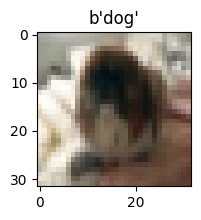

In [2]:
X_train, y_train = fe.training_set()
print(X_train.shape)
print(y_train.shape)

X_test, y_test = fe.test_set()
print(X_test.shape)
print(y_test.shape)

i = 200
fe.visualize(X_test[i], y_test[i])

Feature Extraction

In [3]:
X_train_hu = fe.calculate_hu_moments(X_train)
print(X_train_hu.shape)

X_train_phog = fe.calculate_phog_batch(X_train)
print(X_train_phog.shape)

X_test_hu = fe.calculate_hu_moments(X_test)
print(X_test_hu.shape)

X_test_phog = fe.calculate_phog_batch(X_test)
print(X_test_phog.shape)

(50000, 7)
(50000, 168)
(10000, 7)
(10000, 168)


K-Nearest Neighors (KNN)

In [4]:
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsClassifier

In [5]:
# distance_metrics = ['euclidean', 'manhattan', 'chebyshev']
# neigbor_range = [1, 2, 5, 10, 15, 20, 50, 80, 100, 120]
# results = {metric: [] for metric in distance_metrics}

# for metric in distance_metrics:
#     for n_neighbors in neigbor_range:
#         knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
#         knn.fit(X_train_hu, y_train)
#         y_pred_hu_knn = knn.predict(X_test_hu)
#         precision = precision_score(y_test, y_pred_hu_knn, average="weighted")
#         results[metric].append(precision)

# plt.figure(figsize = (10, 6))

# for metric in distance_metrics:
#     print(f'{metric}: {results[metric]}')
#     plt.plot(neigbor_range, results[metric], label=f'{metric}')

# plt.title('KNN on Hu\'s Moments')
# plt.xlabel('Number of Neighbors')
# plt.ylabel('Precision')
# plt.legend()
# plt.grid(True)
# plt.show()

In [6]:
# distance_metrics = ['euclidean', 'manhattan', 'chebyshev']
# neigbor_range = [1, 2, 5, 10, 15, 20, 50, 80, 100, 120]
# results = {metric: [] for metric in distance_metrics}

# for metric in distance_metrics:
#     for n_neighbors in neigbor_range:
#         knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
#         knn.fit(X_train_phog, y_train)
#         y_pred_phog_knn = knn.predict(X_test_phog)
#         precision = precision_score(y_test, y_pred_phog_knn, average="weighted")
#         results[metric].append(precision)

# plt.figure(figsize = (10, 6))

# for metric in distance_metrics:
#     print(f'{metric}: {results[metric]}')
#     plt.plot(neigbor_range, results[metric], label=f'{metric}')

# plt.title('KNN on PHOG')
# plt.xlabel('Number of Neighbors')
# plt.ylabel('Precision')
# plt.legend()
# plt.grid(True)
# plt.show()

Supported Vector Machine (SVM)

In [7]:
from sklearn.svm import SVC
from joblib import dump, load

In [8]:
# svm = SVC(kernel='rbf')
# svm.fit(X_train_hu, y_train)
# dump(svm, 'svm_models/svm_rbf_hu.joblib')

In [9]:
# svm = load('svm_models/svm_rbf_hu.joblib')
# y_pred_hu_svm = svm.predict(X_test_hu)
# precision = precision_score(y_test, y_pred_hu_svm, average="weighted")
# print(f"SVM with RBF kernel on Hu\'s Moment accuracy: {precision}")

In [10]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
C_range = [30]
results = {kernel: [] for kernel in kernels}

for kernel in kernels:
    for C in C_range:
        svm = SVC(kernel=kernel, C=C)
        svm.fit(X_train_hu, y_train)
        dump(svm, f'svm_models/svm_{kernel}_hu_{C}.joblib')

c:\Users\hoa20\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hoa20\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hoa20\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

linear: [np.float64(0.19026601143977465), np.float64(0.19307061522715543), np.float64(0.19334109669206337), np.float64(0.19258664232245587), np.float64(0.19253731788440398), np.float64(0.19268354832954868)]
poly: [np.float64(0.13846722365940414), np.float64(0.1413074189204751), np.float64(0.1508690483074142), np.float64(0.1733413121874155), np.float64(0.17999852861984736), np.float64(0.1861523843793416)]
rbf: [np.float64(0.130557441463619), np.float64(0.13666607163291825), np.float64(0.14205335538169728), np.float64(0.15900097054979315), np.float64(0.17206788952979996), np.float64(0.17658468297266633)]
sigmoid: [np.float64(0.06439551667423841), np.float64(0.0872542995039222), np.float64(0.06278466075690378), np.float64(0.0763973241653709), np.float64(0.06605732418655116), np.float64(0.09275985369335762)]


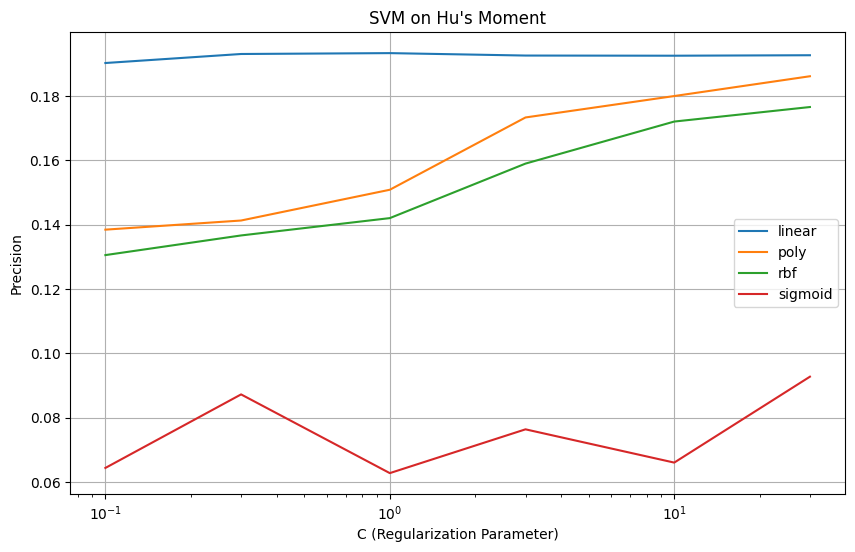

In [11]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
C_range = [0.1, 0.3, 1, 3, 10, 30]
results = {kernel: [] for kernel in kernels}

for kernel in kernels:
    for C in C_range:
        svm = load(f'svm_models/svm_{kernel}_hu_{C}.joblib')
        y_pred_hu_svm = svm.predict(X_test_hu)
        precision = precision_score(y_test, y_pred_hu_svm, average="weighted")
        results[kernel].append(precision)

plt.figure(figsize=(10, 6))

for kernel in kernels:
    print(f'{kernel}: {results[kernel]}')
    plt.plot(C_range, results[kernel], label=f'{kernel}')

plt.title('SVM on Hu\'s Moment')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Precision')
plt.xscale('log')  # Use log scale for C
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# svm = SVC(kernel='rbf')
# svm.fit(X_train_phog, y_train)
# dump(svm, 'svm_models/svm_rbf_phog.joblib')

['svm_models/svm_rbf_phog.joblib']

In [14]:
# svm = load('svm_models/svm_rbf_phog.joblib')
# y_pred_phog_svm = svm.predict(X_test_phog)
# precision = precision_score(y_test, y_pred_phog_svm, average="weighted")
# print(f"SVM with RBF kernel on PHOG accuracy: {precision}")

SVM with RBF kernel on PHOG accuracy: 0.5834153433566863


In [14]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
C_range = [10, 30]
results = {kernel: [] for kernel in kernels}

for kernel in kernels:
    for C in C_range:
        svm = SVC(kernel=kernel, C=C)
        svm.fit(X_train_phog, y_train)
        dump(svm, f'svm_models/svm_{kernel}_phog_{C}.joblib')

linear: [np.float64(0.4362066345228127), np.float64(0.44127080189427254), np.float64(0.4447847379503897), np.float64(0.44976599795206246), np.float64(0.45173987811417354), np.float64(0.4537198106938581)]
poly: [np.float64(0.5656135052134225), np.float64(0.5920350102416172), np.float64(0.5947383850824347), np.float64(0.5804790400386047), np.float64(0.5757730599219946), np.float64(0.5758450987790694)]
rbf: [np.float64(0.49773296582739757), np.float64(0.536603413277967), np.float64(0.5834153433566863), np.float64(0.6087269055938698), np.float64(0.6047382765309978), np.float64(0.6003297451391276)]
sigmoid: [np.float64(0.29370263377039646), np.float64(0.259776504099903), np.float64(0.24756406352368762), np.float64(0.24098330714300437), np.float64(0.24207885801272142), np.float64(0.24842554972190037)]


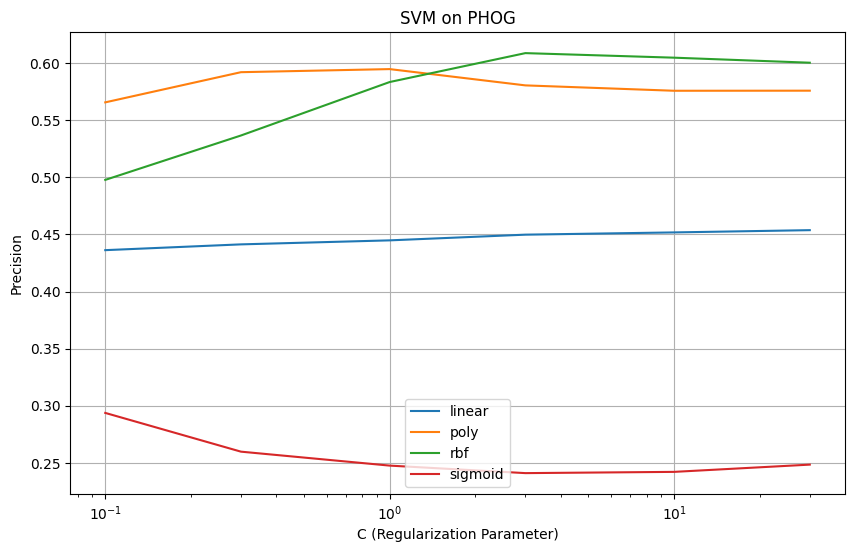

In [15]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
C_range = [0.1, 0.3, 1, 3, 10, 30]
results = {kernel: [] for kernel in kernels}

for kernel in kernels:
    for C in C_range:
        svm = load(f'svm_models/svm_{kernel}_phog_{C}.joblib')
        y_pred_phog_svm = svm.predict(X_test_phog)
        precision = precision_score(y_test, y_pred_phog_svm, average="weighted")
        results[kernel].append(precision)

plt.figure(figsize=(10, 6))

for kernel in kernels:
    print(f'{kernel}: {results[kernel]}')
    plt.plot(C_range, results[kernel], label=f'{kernel}')

plt.title('SVM on PHOG')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Precision')
plt.xscale('log')  # Use log scale for C
plt.legend()
plt.grid(True)
plt.show()

Testing Process

Result Visualization